<a href="https://colab.research.google.com/github/lxxhxng/aipython/blob/main/09_%EC%B9%B4%EB%93%9C%EC%86%8C%EB%B9%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/겨울계절_데이터분석입문/09_카드소비패턴.csv', encoding='cp949')
df

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,서울,강남구,전자상거래,20201021,1.123080e+12,251500,25
1,서울,관악구,요식/유흥,20170312,1.112050e+12,158445,20
2,서울,마포구,주유,20161205,1.113070e+12,8048,15
3,서울,동작구,의료,20201210,1.105070e+12,22635,5
4,서울,NaN,가정생활/서비스,20210216,1.117050e+12,65390,10
...,...,...,...,...,...,...,...
495,서울,종로구,가전/가구,20201108,1.120060e+12,55330,10
496,부산,부평구,의료,20180901,1.122060e+12,853591,5
497,서울,강남구,유통,20160326,1.123060e+12,2052240,5
498,서울,서초구,스포츠/문화/레저,20160804,1.124060e+12,22635,5


In [ ]:
# 열명 변경
df.columns = ['시도', '시군구', '업종', '기준일자', '고객주소집계구별', '금액계', '이용건수계']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도        500 non-null    object 
 1   시군구       442 non-null    object 
 2   업종        500 non-null    object 
 3   기준일자      500 non-null    int64  
 4   고객주소집계구별  500 non-null    float64
 5   금액계       500 non-null    int64  
 6   이용건수계     500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [ ]:
df1 = df.copy(deep=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도        500 non-null    object 
 1   시군구       442 non-null    object 
 2   업종        500 non-null    object 
 3   기준일자      500 non-null    int64  
 4   고객주소집계구별  500 non-null    float64
 5   금액계       500 non-null    int64  
 6   이용건수계     500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [ ]:
# 열 결측치 개수 확인
df1.isnull().sum()

시도           0
시군구         58
업종           0
기준일자         0
고객주소집계구별     0
금액계          0
이용건수계        0
dtype: int64

In [ ]:
# 행 결측치 개수 확인
df1.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int64

In [ ]:
# 결측치가 있는 행인덱스 추출
dfs = df1.isnull().sum(axis=1)
nanlt = list(dfs[dfs >= 1].index)
len(nanlt)

58

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도        500 non-null    object 
 1   시군구       442 non-null    object 
 2   업종        500 non-null    object 
 3   기준일자      500 non-null    int64  
 4   고객주소집계구별  500 non-null    float64
 5   금액계       500 non-null    int64  
 6   이용건수계     500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [ ]:
# 결측치가 있는 행 제거
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도        442 non-null    object 
 1   시군구       442 non-null    object 
 2   업종        442 non-null    object 
 3   기준일자      442 non-null    int64  
 4   고객주소집계구별  442 non-null    float64
 5   금액계       442 non-null    int64  
 6   이용건수계     442 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.6+ KB


In [ ]:
# 결측치가 있는 열 제거
df2 = df.dropna(axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도        500 non-null    object 
 1   업종        500 non-null    object 
 2   기준일자      500 non-null    int64  
 3   고객주소집계구별  500 non-null    float64
 4   금액계       500 non-null    int64  
 5   이용건수계     500 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


In [ ]:
# 특정값으로 채우기
df3 = df.fillna('-')
df3

,시도,시군구,업종,기준일자,고객주소집계구별,금액계,이용건수계
0,서울,강남구,전자상거래,20201021,1.123080e+12,251500,25
1,서울,관악구,요식/유흥,20170312,1.112050e+12,158445,20
2,서울,마포구,주유,20161205,1.113070e+12,8048,15
3,서울,동작구,의료,20201210,1.105070e+12,22635,5
4,서울,-,가정생활/서비스,20210216,1.117050e+12,65390,10
...,...,...,...,...,...,...,...
495,서울,종로구,가전/가구,20201108,1.120060e+12,55330,10
496,부산,부평구,의료,20180901,1.122060e+12,853591,5
497,서울,강남구,유통,20160326,1.123060e+12,2052240,5
498,서울,서초구,스포츠/문화/레저,20160804,1.124060e+12,22635,5


In [ ]:
# 결측값의 앞 행의 값으로 채우기
df3 = df.fillna(method='ffill')
df3

,시도,시군구,업종,기준일자,고객주소집계구별,금액계,이용건수계
0,서울,강남구,전자상거래,20201021,1.123080e+12,251500,25
1,서울,관악구,요식/유흥,20170312,1.112050e+12,158445,20
2,서울,마포구,주유,20161205,1.113070e+12,8048,15
3,서울,동작구,의료,20201210,1.105070e+12,22635,5
4,서울,동작구,가정생활/서비스,20210216,1.117050e+12,65390,10
...,...,...,...,...,...,...,...
495,서울,종로구,가전/가구,20201108,1.120060e+12,55330,10
496,부산,부평구,의료,20180901,1.122060e+12,853591,5
497,서울,강남구,유통,20160326,1.123060e+12,2052240,5
498,서울,서초구,스포츠/문화/레저,20160804,1.124060e+12,22635,5


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/

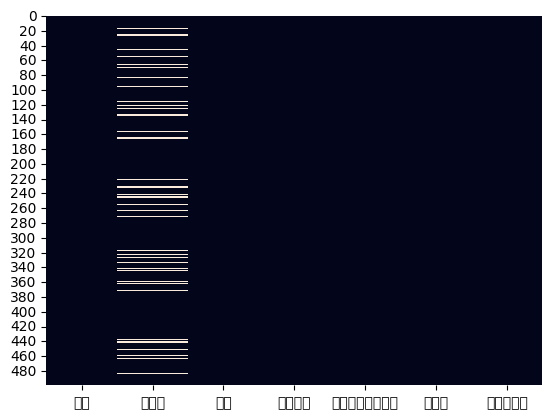

In [ ]:
# seaborn 활용한 결측치 확인
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
# 숫자 -> 문자열
df['기준일자'] = df['기준일자'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도        500 non-null    object 
 1   시군구       442 non-null    object 
 2   업종        500 non-null    object 
 3   기준일자      500 non-null    object 
 4   고객주소집계구별  500 non-null    float64
 5   금액계       500 non-null    int64  
 6   이용건수계     500 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB


In [ ]:
# 기준일자를 년도-월-일 형식으로 변경
df['기준일자'] = df['기준일자'].str[:4]+'-'+df['기준일자'].str[4:6]+'-'+df['기준일자'].str[6:]
df

,시도,시군구,업종,기준일자,고객주소집계구별,금액계,이용건수계
0,서울,강남구,전자상거래,2020-10-21,1.123080e+12,251500,25
1,서울,관악구,요식/유흥,2017-03-12,1.112050e+12,158445,20
2,서울,마포구,주유,2016-12-05,1.113070e+12,8048,15
3,서울,동작구,의료,2020-12-10,1.105070e+12,22635,5
4,서울,NaN,가정생활/서비스,2021-02-16,1.117050e+12,65390,10
...,...,...,...,...,...,...,...
495,서울,종로구,가전/가구,2020-11-08,1.120060e+12,55330,10
496,부산,부평구,의료,2018-09-01,1.122060e+12,853591,5
497,서울,강남구,유통,2016-03-26,1.123060e+12,2052240,5
498,서울,서초구,스포츠/문화/레저,2016-08-04,1.124060e+12,22635,5


In [ ]:
# 기준일자를 날짜형식으로 변경
df['기준일자'] = pd.to_datetime(df['기준일자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시도        500 non-null    object        
 1   시군구       442 non-null    object        
 2   업종        500 non-null    object        
 3   기준일자      500 non-null    datetime64[ns]
 4   고객주소집계구별  500 non-null    float64       
 5   금액계       500 non-null    int64         
 6   이용건수계     500 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 27.5+ KB


In [ ]:
# 년 월 일 추출
df['년도'] = df['기준일자'].dt.year
df['월'] = df['기준일자'].dt.month
df['일'] = df['기준일자'].dt.day
df['요일'] = df['기준일자'].dt.weekday
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시도        500 non-null    object        
 1   시군구       442 non-null    object        
 2   업종        500 non-null    object        
 3   기준일자      500 non-null    datetime64[ns]
 4   고객주소집계구별  500 non-null    float64       
 5   금액계       500 non-null    int64         
 6   이용건수계     500 non-null    int64         
 7   년도        500 non-null    int64         
 8   월         500 non-null    int64         
 9   일         500 non-null    int64         
 10  요일        500 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 43.1+ KB


In [ ]:
dt = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

# 년 월 일 -> 범주형 자료로 변환
df['요일이름'] = df['요일'].map(dt)

df = df.astype({'년도' : 'category', '월': 'category', '일': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시도        500 non-null    object        
 1   시군구       442 non-null    object        
 2   업종        500 non-null    object        
 3   기준일자      500 non-null    datetime64[ns]
 4   고객주소집계구별  500 non-null    float64       
 5   금액계       500 non-null    int64         
 6   이용건수계     500 non-null    int64         
 7   년도        500 non-null    category      
 8   월         500 non-null    category      
 9   일         500 non-null    category      
 10  요일        500 non-null    int64         
 11  요일이름      500 non-null    object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 38.6+ KB


In [ ]:
# 범주형 자료 그래프 함수, 매개변수 작성 : 함수정의
def cplot(df, col):
    if col != '요일이름':
        sns.barplot(x=col, y='금액계', data=df)
    else:
        sns.barplot(x=col, y='금액계', order=['월', '화', '수', '목', '금', '토', '일'], data=df)

    if col == '업종':
        plt.xticks(rotation=90)

    plt.xlabel('')
    plt.title(col)
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

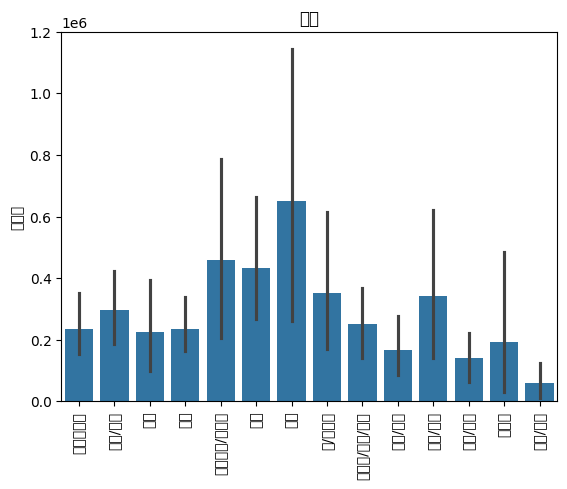

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


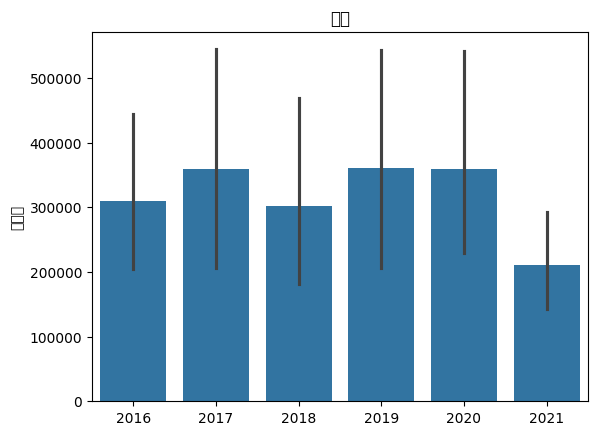

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


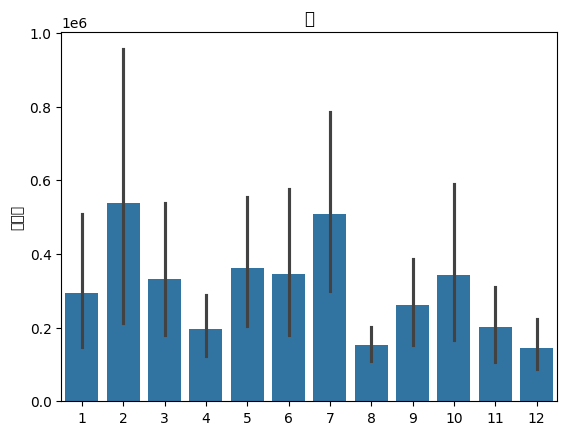

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


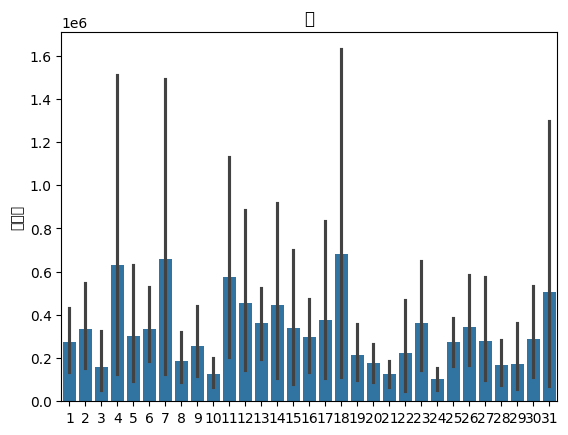

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

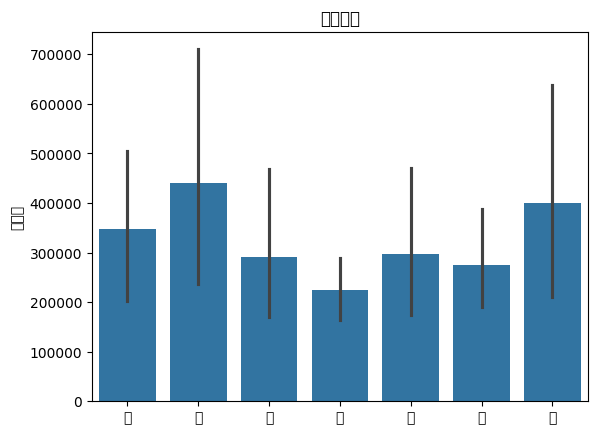

In [ ]:
lt = ['업종', '년도', '월', '일', '요일이름']
for c in lt:
    cplot(df, c)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('C:/Users/JDH/SW_education/DATA/09_카드소비패턴.csv', encoding='cp949') # \ → /
df.head()

# 열명 변경
df.columns = ['시도', '시군구', '업종', '기준일자', '고객주소집계구별', '금액계', '이용건수계']
df.info()

# 상위 데이터 확인
df.head()

# 결측치 확인을 위한 데이터프레임 복사 1
df1 = df.copy(deep=True)
df1.info()

# 결측치 확인을 위한 데이터프레임 복사 2
df2= df.copy(deep=True)
df2.info()

# 결측치 확인을 위한 데이터프레임 복사 3
df3 = df.copy(deep=True)
df3.info()

# 결측치 확인 : NaN(not a number) 존재 시, True
df1.isnull()

# 결측치 개수 확인
df1.isnull().sum()

# 결측치 개수 확인
df1.isnull().sum(axis=1)

# 결측치가 있는 행인덱스 추출
dfs = df1.isnull().sum(axis=1)
nanlt = list(dfs[dfs >= 1].index)
len(nanlt)

nanlt

# 결측치가 있는 행인덱스 확인
df1[df1.index.isin(nanlt)]

# 결측치가 있는 행 제거
df1 = df1.dropna()

# 삭제 여부 확인
df1[df1.index.isin(nanlt)]

df1.info()

df2.isnull().sum()

# 결측치가 있는 열 제거 : 시군구 삭제됨
df2 = df2.dropna(axis=1)
df2.info()

# 결측값 채우기
df3.info()

# 결측값 채우기
df3 = df3.fillna('-')
df3.head()

# 적용 여부 확인
df3[df3.index.isin(nanlt)]

# 특정값 변환 방법
import numpy as np
df3 = df3.replace('-', np.nan)
df.head()

# 재적용 여부 확인
df3[df3.index.isin(nanlt)]

# 결측값의 앞 행의 값으로 채우기 : 4행 NaN이 직전 '동작구'로 변환
df3 = df3.fillna(method='ffill')
df3.head(10)

# sesborn 활용한 결측치 확인
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)
plt.show()

df.info() # 기준일자 수치 확인

# 숫자를 문자열로 변경
df['기준일자'] = df['기준일자'].astype('str')
df.info()

# 8자리 문자열을 4-2-2 문자열로 변경
s = '20240107'
s = s[:4] + '-' + s[4:6] + '-' + s[6:]
s

# 기준일자를 연-월-일 형식으로 변경
df['기준일자'] = df['기준일자'].str[:4] + '-' + df['기준일자'].str[4:6] + '-' + df['기준일자'].str[6:]
df.head(2)

# 기준일자를 날짜형식으로 변경
df['기준일자'] = pd.to_datetime(df['기준일자'])
df.info()

# 연월일 추출
df['연'] = df['기준일자'].dt.year
df['월'] = df['기준일자'].dt.month
df['일'] = df['기준일자'].dt.day
df['요일'] = df['기준일자'].dt.weekday
df.info()

df.head()

# 사전 생성
dt = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

# 연월일, 범주형 자료로 변환 : map함수는 반드시 series 타입에서만 사용
df['요일이름'] = df['요일'].map(dt)
df = df.astype({'연':'category', '월':'category', '일':'category'})
df.info()

# 카테고리 형태로 변경하면, 범주형 자료 분석 가능
df['요일이름'].unique()

df[['시도']].value_counts()

# 범주형 자료 그래프 함수, 매개변수 작성 : 함수 define(정의)
def cplot(df, col) :
    if col != '요일이름' : sns.barplot(x=col, y='금액계', data=df)
    else : sns.barplot(x=col, y='금액계', order=['월','화', '수', '목', '금', '토', '일'],  data=df)
    if col == '업종' : plt.xticks(rotation=90)
    plt.xlabel('')
    plt.title(col)
    plt.show()

df.columns

lt = ['업종', '연', '월', '일', '요일이름']
for c in lt :
    cplot(df, c)